## Review on basic Python data visualization and data summary

### Describing a data set
In a data table (also called data matrix)
- The data is 2-dimensional (rows x columns)
- Observations: each individual subject, case, or sample point
- Variable/Feature: characteristics that are recorded for each subject in the sample

In [10]:
import pandas as pd
df = pd.read_csv("ICUAdmissions.csv")
print(df.head())

   ID  Status  Age  Sex  Race  Service  Cancer  Renal  Infection  CPR  ...  \
0   8       0   27    1     1        0       0      0          1    0  ...   
1  12       0   59    0     1        0       0      0          0    0  ...   
2  14       0   77    0     1        1       0      0          0    0  ...   
3  28       0   54    0     1        0       0      0          1    0  ...   
4  32       0   87    1     1        1       0      0          1    0  ...   

   HeartRate  Previous  Type  Fracture  PO2  PH  PCO2  Bicarbonate  \
0         88         0     1         0    0   0     0            0   
1         80         1     1         0    0   0     0            0   
2         70         0     0         0    0   0     0            0   
3        103         0     1         1    0   0     0            0   
4        154         1     1         0    0   0     0            0   

   Creatinine  Consciousness  
0           0              1  
1           0              1  
2           0    

### Describing variables
There are at least two ways to describe variables
1. By value type
- Numerical variables: take on numerical values with meaning; able to perform mathematical operations on data
- Categorical variables: take on names, categories, or labels; categories are sometimes represented by numbers (includes ID numbers)
2. By function
- Response/Target/Dependent variable: defined by the particular research question a study seeks to address and measures the outcome of interest in the study
- Explanatory/Independent variable/Features: a secondary variable(s) that explains changes in the response variable 

### Important terminology clarification
- feature
- variable
- attribute - in a visualization, describes elements of the visualization that contribute to its meaning; in data, synonymous to feature


## In class activity
Research question: "What factors may be related to the heart rate in ICU admissions?"
- Make three visualizations
- Three things to decide:
    - What features do I want to choose for the data visualization?
    - What types of figures will I choose?
    - What information do I want to achieve from the data visualization

In [11]:
df.columns

Index(['ID', 'Status', 'Age', 'Sex', 'Race', 'Service', 'Cancer', 'Renal',
       'Infection', 'CPR', 'Systolic', 'HeartRate', 'Previous', 'Type',
       'Fracture', 'PO2', 'PH', 'PCO2', 'Bicarbonate', 'Creatinine',
       'Consciousness'],
      dtype='object')

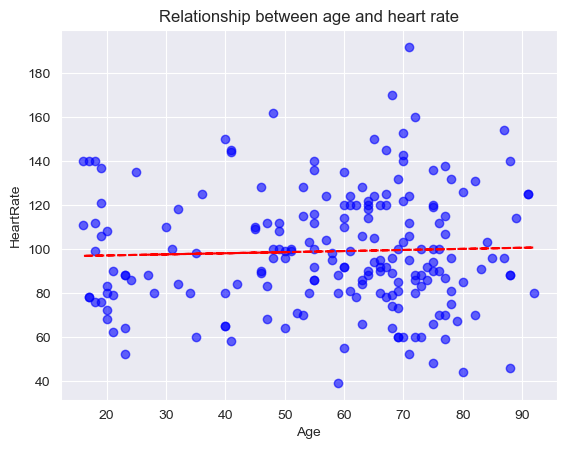

In [12]:
# Visualization #1 Age vs. HR scatter plot
import matplotlib.pyplot as plt
import numpy as np

age = df["Age"]
hr = df["HeartRate"]

# Calculate line of best fit
z = np.polyfit(age, hr, 1)
p = np.poly1d(z)

plt.scatter(x=age, y=hr, color="blue", alpha=0.6)
# Plot line of best fit
plt.plot(age, p(age), "r--")
plt.title("Relationship between age and heart rate")
plt.xlabel("Age")
plt.ylabel("HeartRate")
plt.show()

In [13]:
# Average HR by Sex
avg_hr_0 = list(df[df["Sex"] == 0]["HeartRate"].mean())
avg_hr_1 = list(df[df["Sex"] == 1]["HeartRate"].mean())
plt.boxplot(x = avg_hr_0)
plt.boxplot(x = avg_hr_1)
plt.legend()
plt.show()

TypeError: 'numpy.float64' object is not iterable

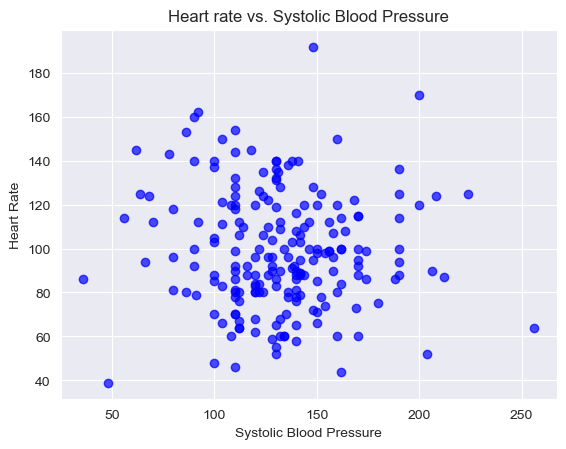

In [14]:
# Scatter of blood pressure and HR
bp = df["Systolic"]
plt.scatter(x=bp, y=hr, color="blue", alpha=0.7)
plt.title("Heart rate vs. Systolic Blood Pressure")
plt.xlabel("Systolic Blood Pressure")
plt.ylabel("Heart Rate")
plt.show()

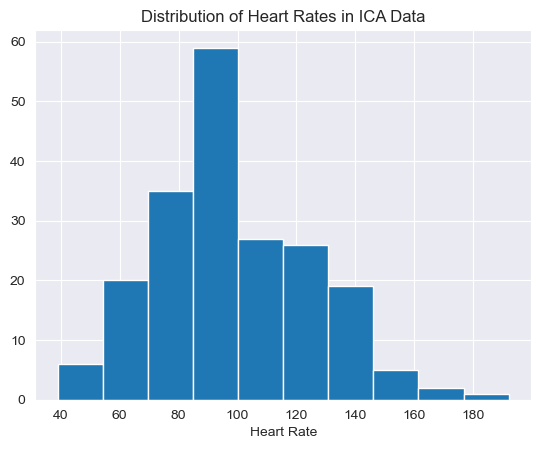

In [15]:
# First visualization: plot distribution of heart rates to see if its skewed
plt.hist(hr, bins=10)
plt.title("Distribution of Heart Rates in ICA Data")
plt.xlabel("Heart Rate")
plt.show()

In [16]:
# Second example - HR vs. something else 
# - For the something else, you may choose something you believe could have an impact on HR
# - ... or a variable that you believe can show a trend

### Basic data visualization choices
- One categorical: bar plot
- One continuous: histogram/ density plot / boxplot
- Two continuous: scatter plot
- One categorical and one continuous: side-by-side boxplot
- Two categorical: side-by-side barplot

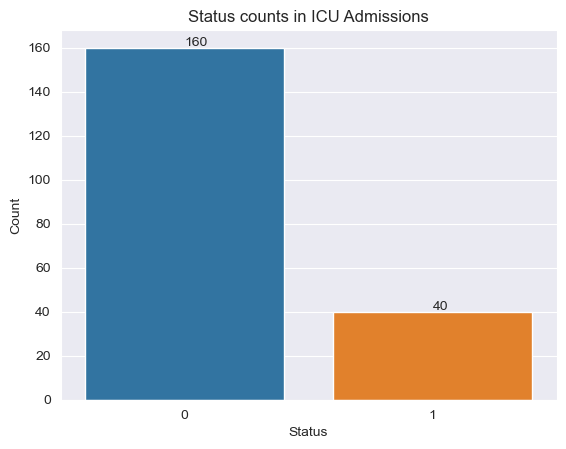

In [17]:
# Bar plot in seaborn
import seaborn as sns
sns.countplot(x="Status", data = df)
plt.title("Status counts in ICU Admissions")
plt.xlabel("Status")
plt.ylabel("Count")
# Place counts on the bars
status_counts = df["Status"].value_counts()
for i, value in enumerate(status_counts.values):
    plt.text(i, value + 1, str(value)) # value+1 = place at value + 1 on the vertical axis
plt.show()

In [18]:
status_counts = df["Status"].value_counts()
status_counts

Status
0    160
1     40
Name: count, dtype: int64

In [19]:
# Represent counts as a percentage
status_pcts = df["Status"].value_counts(normalize=True) * 100
status_pcts

Status
0    80.0
1    20.0
Name: proportion, dtype: float64

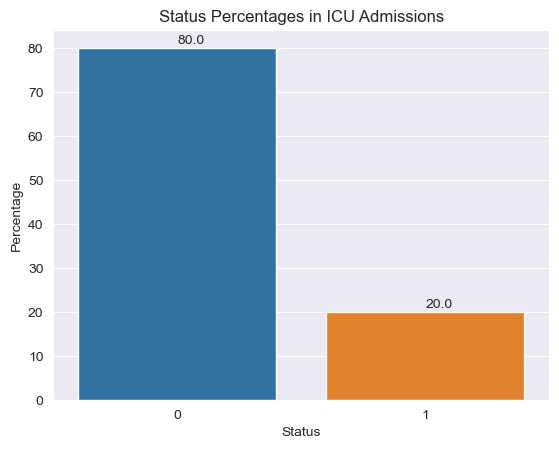

In [20]:
sns.barplot(x=status_pcts.index, y=status_pcts.values)
plt.title("Status Percentages in ICU Admissions")
plt.xlabel("Status")
plt.ylabel("Percentage")
for i, value in enumerate(status_pcts.values):
    plt.text(i, value + 1, str(value))
plt.show()

### What to write about a bar plot
- What is this plot about? What are the features?
- Report a percentage/count for each category
- Whether there is a clear/significant difference in the counts/percentages

### Status Percentages in ICU Admissions
- This plot shows the percentage of patients admitted to the ICU who survived and those who did not. Patients with status '0' survived, while patients with status '1' did not survive.
- This plot shows that 80% of the 200 patients admitted to the ICU survived. 

## One continuous: histogram, density plot, boxplot

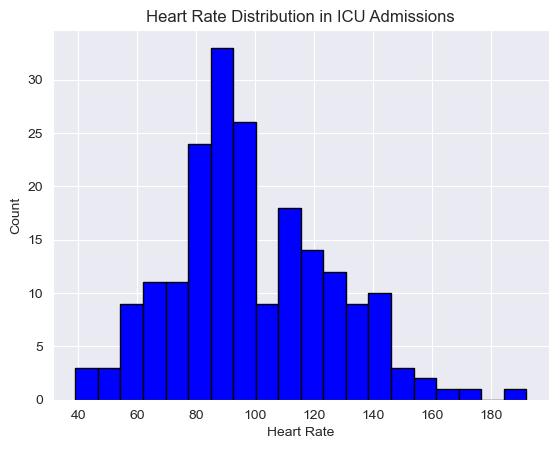

In [21]:
# Histogram 
plt.hist(df["HeartRate"], color="blue", bins=20, edgecolor="black")
plt.title("Heart Rate Distribution in ICU Admissions")
plt.xlabel("Heart Rate")
plt.ylabel("Count")
plt.show()

/Users/sasha/anaconda3/envs/ds3500/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


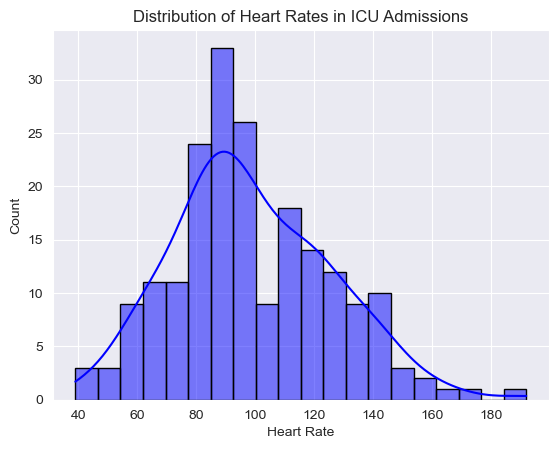

In [22]:
# Seaborn Hist
sns.histplot(df["HeartRate"], kde=True, color="blue", bins=20, edgecolor="black")
plt.title("Distribution of Heart Rates in ICU Admissions")
plt.xlabel("Heart Rate")
plt.ylabel("Count")
plt.show()

/Users/sasha/anaconda3/envs/ds3500/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


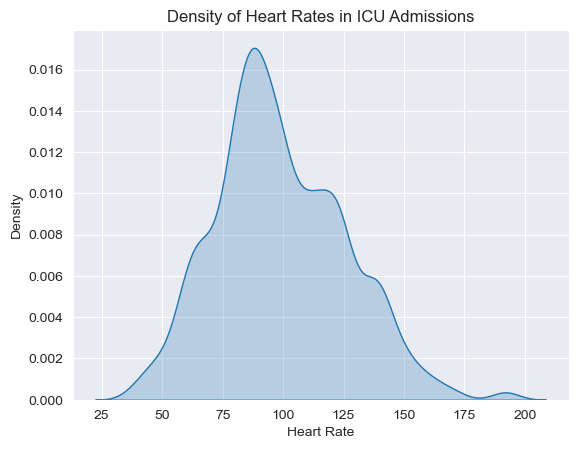

In [23]:
# Density Plot
sns.kdeplot(df["HeartRate"], bw_adjust=0.6, fill=True) # Higher the value, smoother the curve
plt.xlabel("Heart Rate")
plt.ylabel("Density")
plt.title("Density of Heart Rates in ICU Admissions")
plt.show()

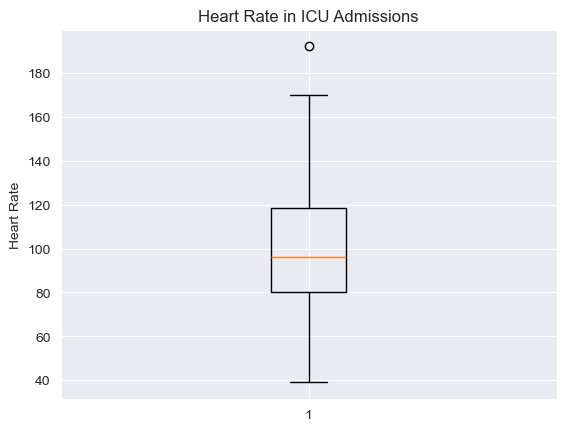

In [24]:
# Boxplot
plt.boxplot(x=df["HeartRate"])
plt.title("Heart Rate in ICU Admissions")
plt.ylabel("Heart Rate")
plt.show()

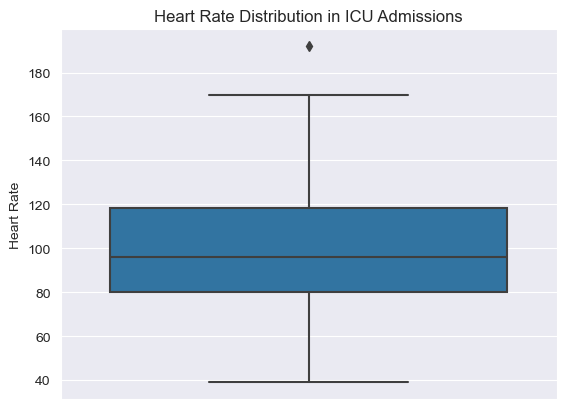

In [25]:
# Boxplot with sns
sns.boxplot(y="HeartRate", data=df)
plt.ylabel("Heart Rate")
plt.title("Heart Rate Distribution in ICU Admissions")
plt.show()

### Difference between box plots, histograms, and density plots
- Box plots assume that the data follows a normal distribution. From a boxplot, you will not be able to identify the trend. 
- If your data is bimodal, you would not be able to tell from a boxplot. Use a histogram or a density plot to explore trends/distributions in data.
- Box plots showcase summary statistics of the data and whether there are any outliers.
- If you have multiple groups of data, box plots and density plots are useful for comparing groups side-by-side. This is hard to do with a histogram

### Difference between histograms and bar plots
- Histograms are for numerical features while bar plots are for categorical features.
- Histograms are always vertical while bar plots can be horizontal.
- Histogram usually does not have spaces between bars, while bar plot does.
- The orders of the bars of a histogram are significant and cannot change, but those of a bar plot can. 

### What to write about a histogram/density plot
- What is the plot about?
- What is the shape of the plot? Skewness (right/positive, no skew, left/negative) and mode (unimodal, bimodal...)
- Where the majority of the data lies (typical value - mean $\pm$ sd)
- Potential outliers

### Example
- This plot shows the distribution of heart rates in ICU Admissions. The graph shows that the distribution of heart rates is unimodal centered around 90 and slightly skewed to the right. The typical value is within the range 98.9 $\pm$ 26.8.

### What to write about a box plot
- What is the plot about?
- Can comment on the skewness but not the mode
- Report the majority of the data (IQR)
- Describe the outliers

### Example
This plot shows the distribution of heart rates in ICU Admissions. It seems that the distribution is slightly skewed to the right and it has one upper outliers. The IQR is (80, 118.25).

In [26]:
# Summary Statistics for HR
df["HeartRate"].describe()

count    200.00000
mean      98.92500
std       26.82962
min       39.00000
25%       80.00000
50%       96.00000
75%      118.25000
max      192.00000
Name: HeartRate, dtype: float64

### Two continuous: Scatter plot

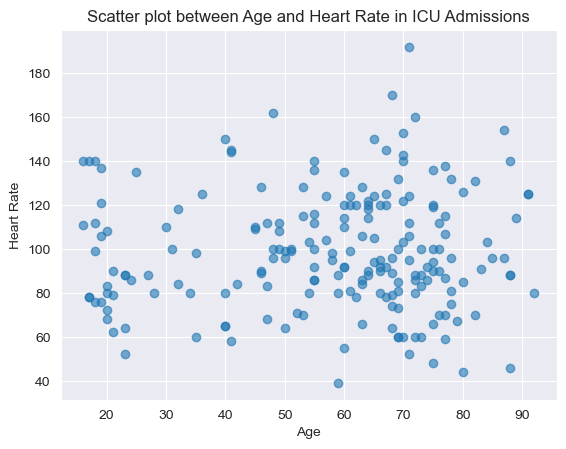

In [27]:
plt.scatter(df["Age"], df["HeartRate"], alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Heart Rate")
plt.title("Scatter plot between Age and Heart Rate in ICU Admissions")
plt.show()

### Potential Problems
- Sometimes, categorical values can be represented with numbers. Some may think that they are continuous (because they're numeric), but that's not the case. 
- A scatter plot with this kind of comparison would look like this

plt.scatter(df["Status"], df["HeartRate"], alpha=0.6)
plt.show()

It is technically correct, but does not provide any useful information.

### What to write about scatter plots
- What is this plot about?
- What is the trend (linear, non-linear, quadratic, exponential?)
- If linear, what is the correlation?
- Are there any outliers or clusters?

### Example
- This plot shows the relationship between age and heart rate among ICU admissions. There is no clear trend or relationship between these two values. There are also no clear outliers. There might be a cluster for the age between 60-80 and a heart rate between 100 and 120.

### One categorical and one continuous: side-by-side boxplot or side-by-side density plot

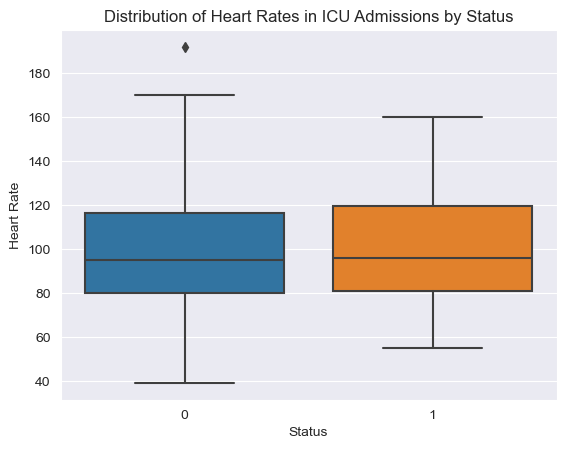

In [28]:
sns.boxplot(x="Status", y="HeartRate", data=df)
plt.title("Distribution of Heart Rates in ICU Admissions by Status")
plt.xlabel("Status")
plt.ylabel("Heart Rate")
plt.show()

/Users/sasha/anaconda3/envs/ds3500/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


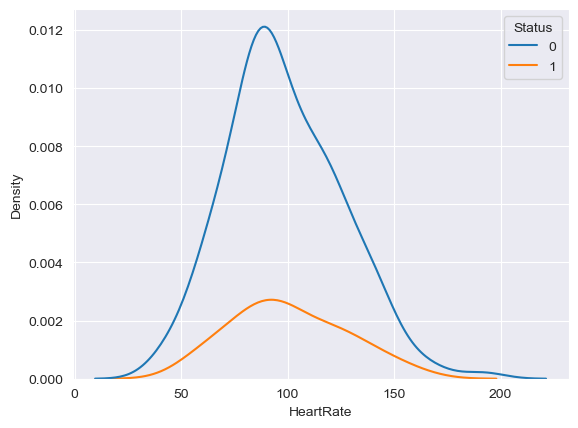

In [29]:
sns.kdeplot(x="HeartRate", hue="Status", data=df)
plt.show()

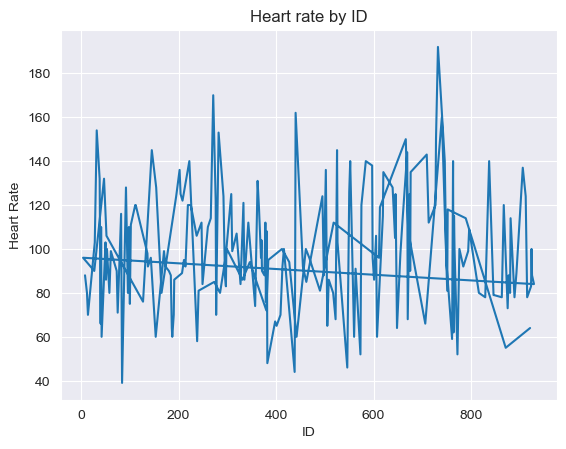

In [30]:
plt.plot(df["ID"], df["HeartRate"])
plt.xlabel("ID")
plt.ylabel("Heart Rate")
plt.title("Heart rate by ID")
plt.show()

This plot is nonsensical because the ID and the heart rate do not have any sort of correlation

### Two categorical: side-by-side barplot

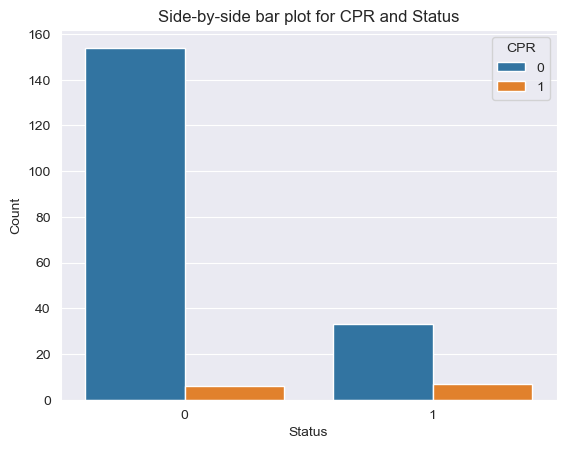

In [37]:
# CPR vs. Status
df["CPR"] = df["CPR"].astype("str")
sns.countplot(x="Status", hue="CPR", data=df)
plt.xlabel("Status")
plt.ylabel("Count")
plt.title("Side-by-side bar plot for CPR and Status")
plt.show()

In [40]:
proportion_table = pd.crosstab(df["Status"], df["CPR"], normalize="all") # The sum of all values in the table is  1
proportion_table_2 = pd.crosstab(df["Status"], df["CPR"], normalize="index") # The sum of all values in each row and each column is  1
proportion_table, proportion_table_2

(CPR         0      1
 Status              
 0       0.770  0.030
 1       0.165  0.035,
 CPR          0       1
 Status                
 0       0.9625  0.0375
 1       0.8250  0.1750)

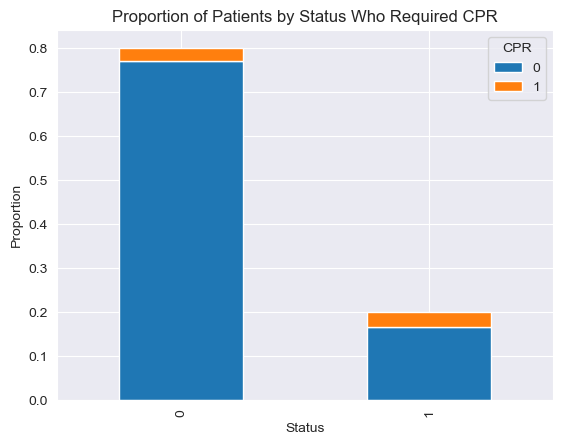

In [43]:
proportion_table.plot(kind='bar', stacked=True)
plt.xlabel("Status")
plt.ylabel("Proportion")
plt.title("Proportion of Patients by Status Who Required CPR")
plt.show()

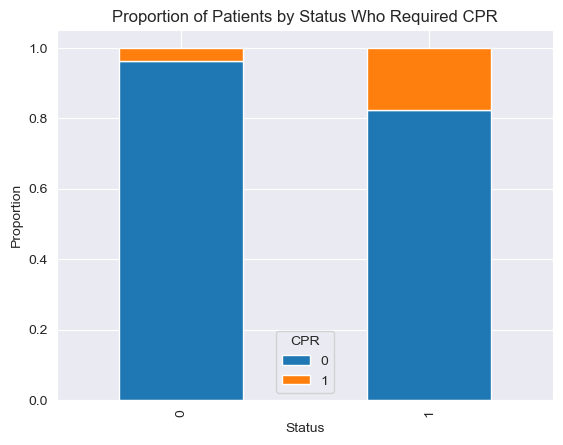

In [44]:
proportion_table_2.plot(kind="bar", stacked=True)
plt.xlabel("Status")
plt.ylabel("Proportion")
plt.title("Proportion of Patients by Status Who Required CPR")
plt.show()

### What to write about a side-by-side bar plot
- What is the plot about?
- Highlight the comparison in the two bars
- EX: The figure is a stacked bar plot for the status vs. CPR. The color is indicating whether the patient received CPR. Each bar indicates the group of patients that survived the ICU and the group of patients that did not. From the figure, it seems that the distribution of patients in each group who received CPR is different. Among patients that survived, less patients required CPR compared to those who did not survive. This is because patients who did not survive the ICU were likely in more critical condition than those that did survive, thus CPR may have been necessary to provide them care.